# Create Dataset

### Dataset Problems

#### Problem 1 - Lack of images

Our dataset consists of 52 card images - 52 classes and one image per class. 

#### Problem 2 - Training dataset is not a good representative of the test dataset (real world application)

The training dataset we have is the PNG format of the dataset (transparent and clear background). This clean dataset is not representative of the real-world noisy dataset when users take photos of the cards with their phones. Lighting/shadow, partially covered images (e.g. users whole the cards in their hands) will pose challenges to the model that is trained on a clean dataset.

### Solutions

#### Solution 1 - Use image augmentation to generate new images

Since the number of image per class is very small, we have to use image augmentations to generate new images. This is done through `ImageDataGenerator()` function. Our target is to create at least 200 new images per class using image augmentation techniques.

#### Solution 2 - Mimick the test dataset by taking photos and introducing noise

A handful of images are taken and image augmentation is used to create a larger dataset.

## Import Libraries

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

## Visualize Original Images

### PNG Images

In [11]:
def get_image_names(PATH):
    img_names = []
    img_paths = []
    for img in os.listdir(PATH):
        img_names.append(img[:-4])
        img_path = os.path.join(PATH, img)
        img_paths.append(img_path)

    random.Random(4).shuffle(img_names)
    random.Random(4).shuffle(img_paths)
    return img_names, img_paths

PATH = 'Raw_Card_Images'
img_names, img_paths = get_image_names(PATH)

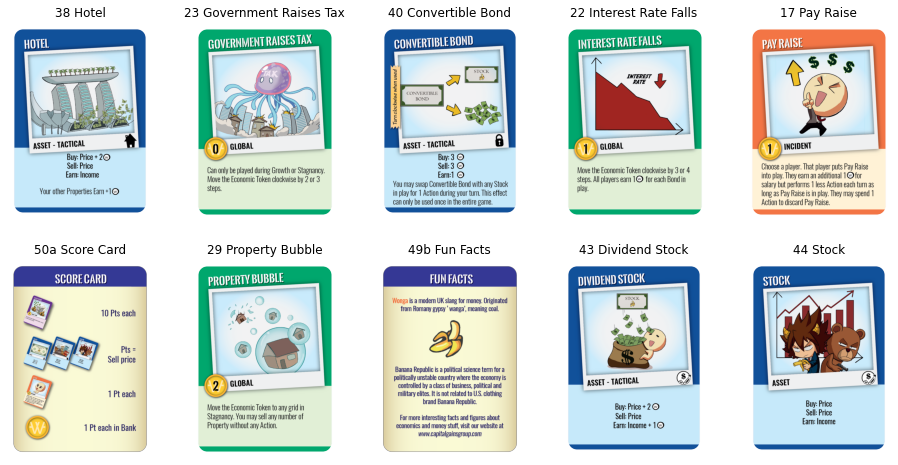

In [14]:
def visualize_images(img_names, img_paths):
    plt.figure(figsize=(16, 8))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        img = mpimg.imread(img_paths[i])
        plt.imshow(img)
        plt.title(img_names[i])
        plt.axis("off")
        
visualize_images(img_names, img_paths)

### Camera taken images

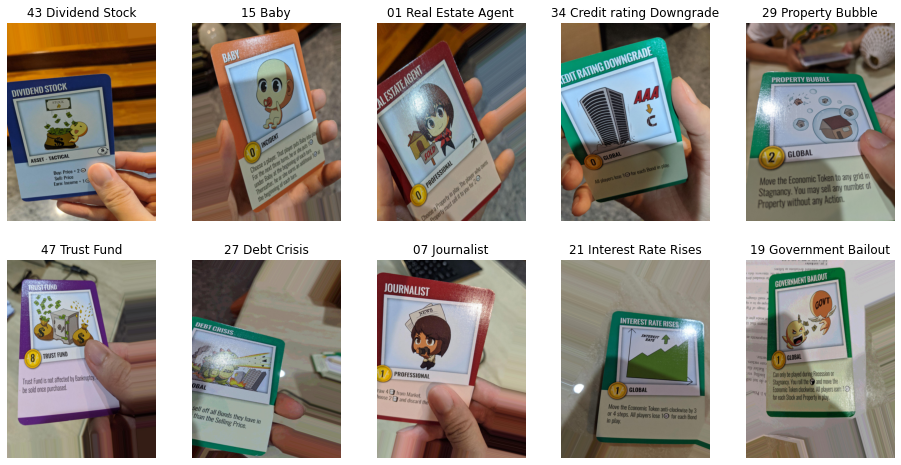

In [16]:
PATH = 'camera_images'
img_names, img_paths = get_image_names(PATH)
visualize_images(img_names, img_paths)

## Generate Augmented Images 

In [25]:
PATH = 'train_noise'
for folder in os.listdir(PATH):
    IMG_DIR = os.path.join(PATH, folder)
    for filename in os.listdir(IMG_DIR):
        num_of_img = 10     

        datagen = ImageDataGenerator( 
                rotation_range=30,
                width_shift_range=0.2,
                height_shift_range=0.2,
                brightness_range=[0.,1.1],
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=False,
                fill_mode='nearest')

        img_path = os.path.join(IMG_DIR, filename)
        img = load_img(img_path)
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape) 

        i = 1
        for batch in datagen.flow(x, batch_size=1,save_to_dir=IMG_DIR, save_prefix=folder, save_format='jpg'):
            i += 1
            if i > num_of_img:
                break  

## Visualize Augmented Dataset

In [19]:
def get_augmented_image_names(PATH):
    img_names = []
    img_paths = []
    for folder in os.listdir(PATH):
        IMG_DIR = os.path.join(PATH, folder)
        for filename in os.listdir(IMG_DIR):
            img_names.append(folder)
            img_path = os.path.join(PATH, folder, filename)
            img_paths.append(img_path)

    random.Random(4).shuffle(img_names)
    random.Random(4).shuffle(img_paths)
    return img_names, img_paths

PATH = 'TfModels_52_fine'
img_names, img_paths = get_augmented_image_names(PATH)

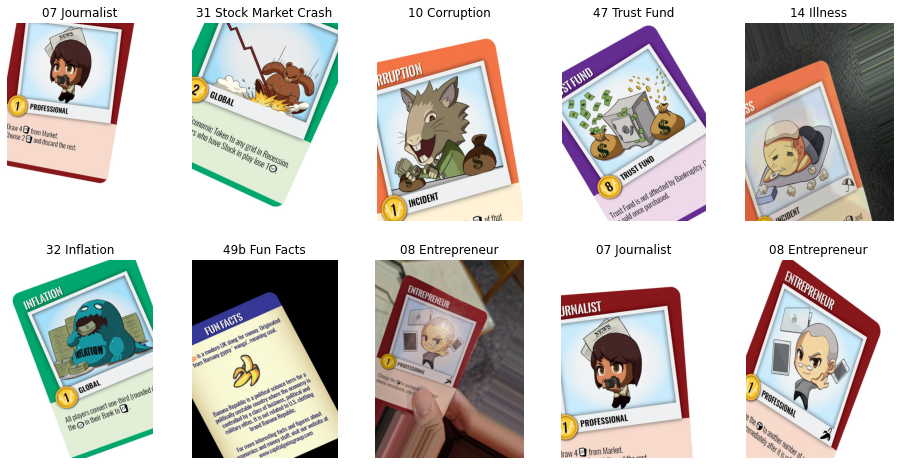

In [20]:
visualize_images(img_names, img_paths)